<a href="https://colab.research.google.com/github/bhalleaheesha/Data-Analyst-Projects/blob/main/Customer_Churn_Analysis_%26_Retention_Insights_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/Customer Churn Data Updated.csv")

df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,...,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,id_valid,channel_sales
0,1,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,...,25.44,25.44,2,678.99,3,India,43.648,1,True,Online
1,2,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,...,16.38,16.38,1,18.89,6,United States,13.800,0,True,Other
2,3,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,...,28.60,28.60,1,6.60,6,United States,13.856,0,True,Online
3,4,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,...,30.22,30.22,1,25.46,6,United States,13.200,0,True,Agent
4,5,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,...,44.91,44.91,1,47.98,6,United States,19.800,0,True,Other


In [ ]:
# Dataset info
df.info()

# Check missing values
df.isnull().sum()

# Remove duplicates
df.drop_duplicates(inplace=True)

# Fill missing values
df.fillna(method="ffill", inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  int64  
 1   cons_12m                        14606 non-null  int64  
 2   cons_gas_12m                    14606 non-null  int64  
 3   cons_last_month                 14606 non-null  int64  
 4   date_activ                      14606 non-null  object 
 5   date_end                        14606 non-null  object 
 6   date_modif_prod                 14606 non-null  object 
 7   date_renewal                    14606 non-null  object 
 8   forecast_cons_12m               14606 non-null  float64
 9   forecast_cons_year              14606 non-null  int64  
 10  forecast_discount_energy        14606 non-null  float64
 11  forecast_meter_rent_12m         14606 non-null  float64
 12  forecast_price_energy_off_peak  

/tmp/ipython-input-3002610551.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)


In [ ]:
print(df.columns)

Index(['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'date_activ',
       'date_end', 'date_modif_prod', 'date_renewal', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn',
       'id_valid', 'channel_sales'],
      dtype='object')


In [ ]:
# Total customers
total_customers = df.shape[0]

# Churn rate
churn_rate = df["churn"].value_counts(normalize=True) * 100

print("Total Customers:", total_customers)
print("Churn Rate (%):")
print(churn_rate)

Total Customers: 14606
Churn Rate (%):
churn
0    90.284814
1     9.715186
Name: proportion, dtype: float64


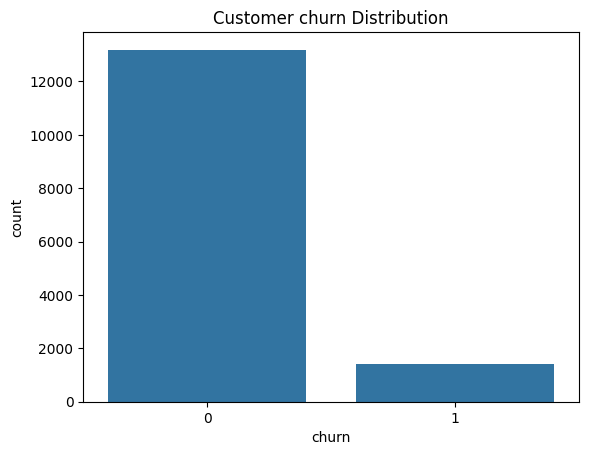

In [ ]:
sns.countplot(x="churn", data=df)
plt.title("Customer churn Distribution")
plt.show()

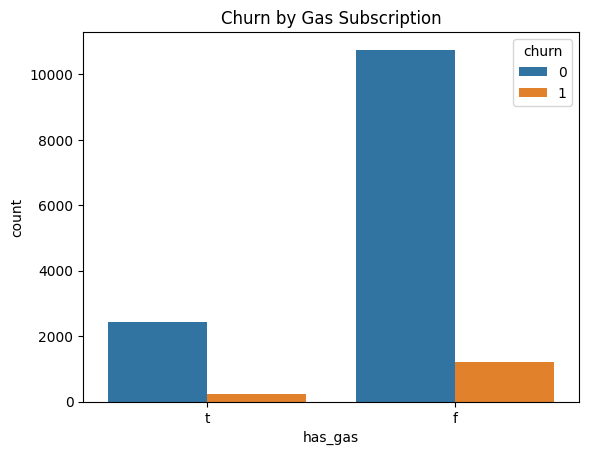

In [ ]:
sns.countplot(x="has_gas", hue="churn", data=df)
plt.title("Churn by Gas Subscription")
plt.show()

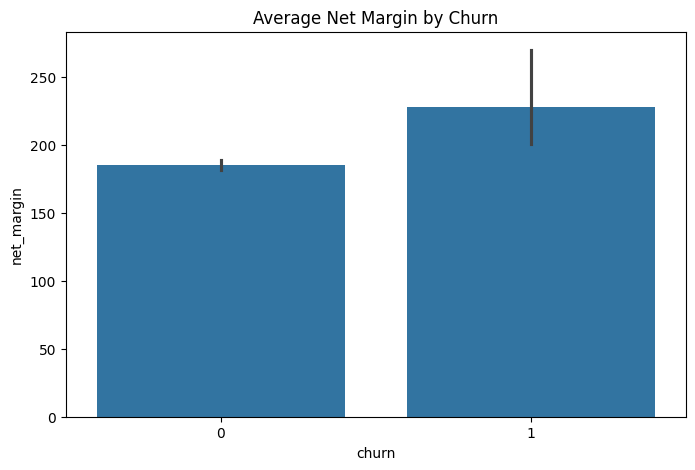

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(x="churn", y="net_margin", data=df, estimator="mean")
plt.title("Average Net Margin by Churn")
plt.show()

In [ ]:
churn_table = (
    df["churn"]
    .value_counts()
    .reset_index()
    .rename(columns={
        "index": "Churn Status",
        "churn": "Customer Count"
    })
)

churn_table["Percentage"] = (
    churn_table["Customer Count"] / churn_table["Customer Count"].sum()
) * 100

churn_table

,Customer Count,count,Percentage
0,0,13187,0.0
1,1,1419,100.0


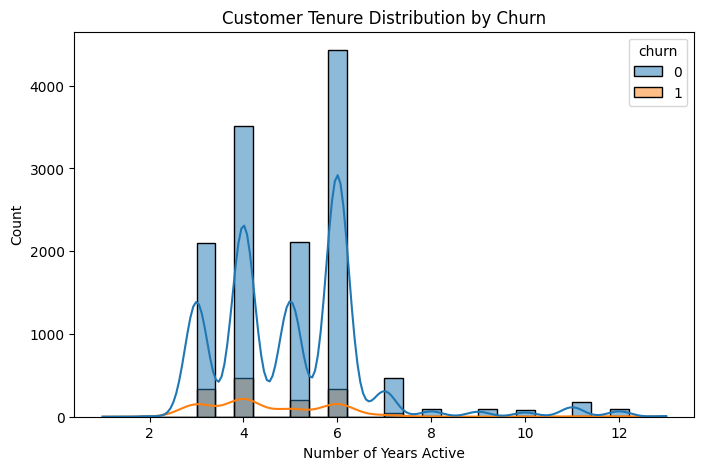

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(data=df, x="num_years_antig", hue="churn", bins=30, kde=True)
plt.title("Customer Tenure Distribution by Churn")
plt.xlabel("Number of Years Active")
plt.show()

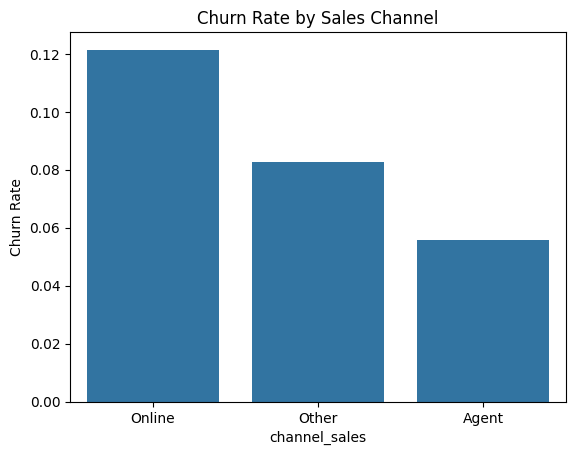

In [ ]:
churn_rate = (
    df.groupby("channel_sales")["churn"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

sns.barplot(x="channel_sales", y="churn", data=churn_rate)
plt.title("Churn Rate by Sales Channel")
plt.ylabel("Churn Rate")
plt.show()

In [ ]:
df[['origin_up']].head(10)

,origin_up
0,India
1,United States
2,United States
3,United States
4,United States
5,India
6,India
7,India
8,United States
9,India


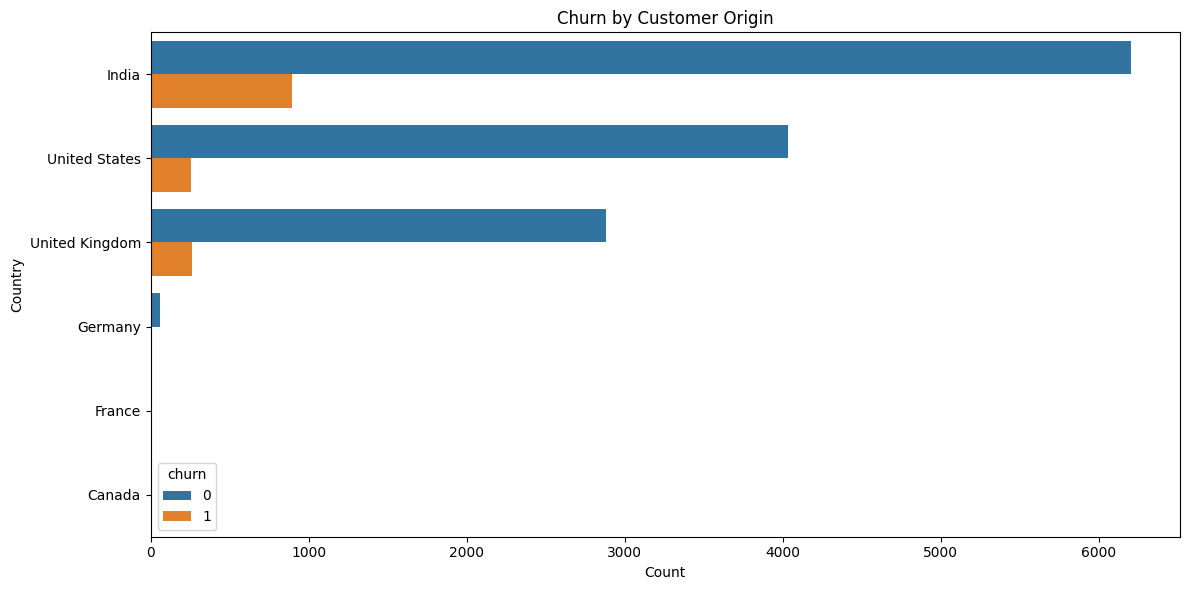

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(
    data=df,
    y='origin_up',
    hue='churn'
)

plt.title("Churn by Customer Origin")
plt.xlabel("Count")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

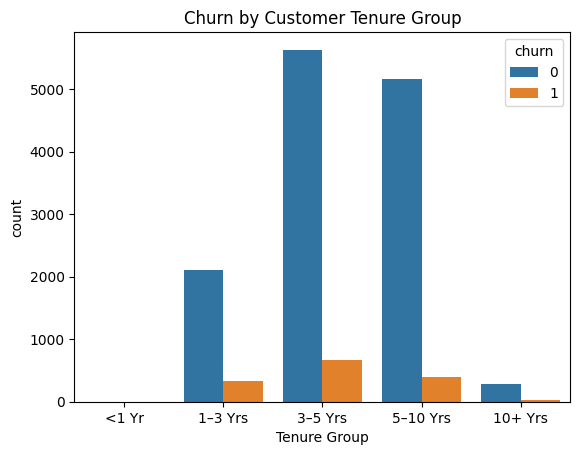

In [ ]:
df["TenureGroup"] = pd.cut(
    df["num_years_antig"],
    bins=[0, 1, 3, 5, 10, 20],
    labels=["<1 Yr", "1–3 Yrs", "3–5 Yrs", "5–10 Yrs", "10+ Yrs"]
)

sns.countplot(x="TenureGroup", hue="churn", data=df)
plt.title("Churn by Customer Tenure Group")
plt.xlabel("Tenure Group")
plt.show()

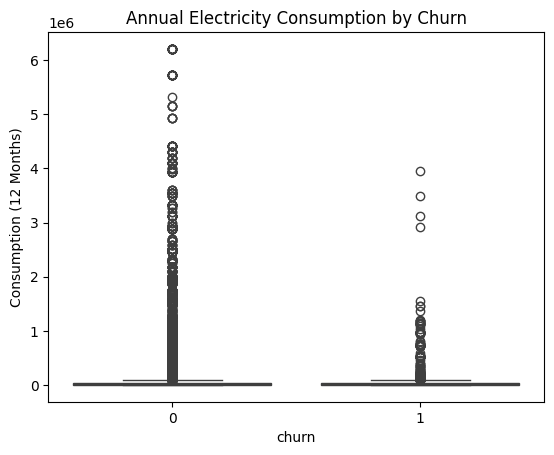

In [ ]:
sns.boxplot(x="churn", y="cons_12m", data=df)
plt.title("Annual Electricity Consumption by Churn")
plt.ylabel("Consumption (12 Months)")
plt.show()

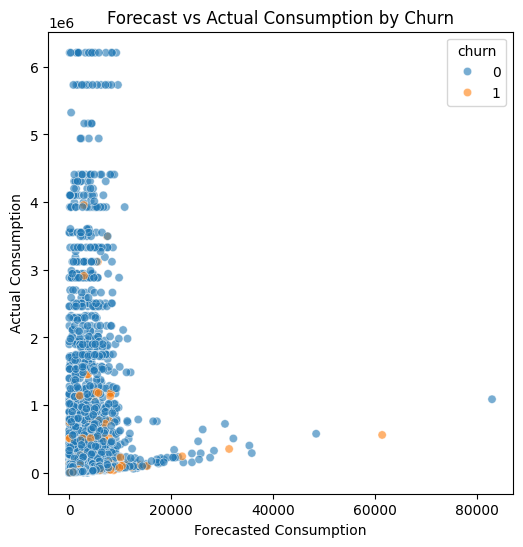

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(
    x="forecast_cons_12m",
    y="cons_12m",
    hue="churn",
    data=df,
    alpha=0.6
)

plt.title("Forecast vs Actual Consumption by Churn")
plt.xlabel("Forecasted Consumption")
plt.ylabel("Actual Consumption")
plt.show()

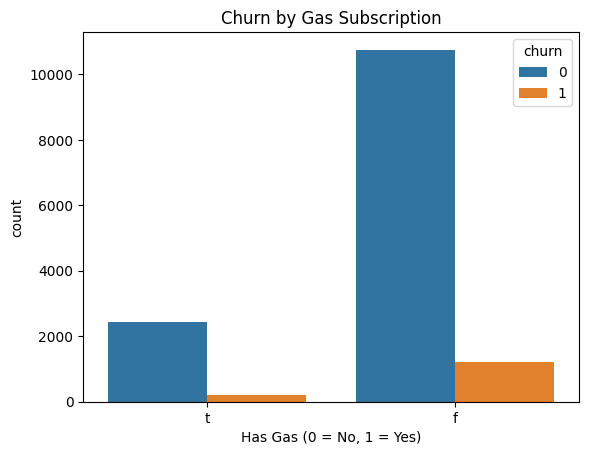

In [ ]:
sns.countplot(x="has_gas", hue="churn", data=df)
plt.title("Churn by Gas Subscription")
plt.xlabel("Has Gas (0 = No, 1 = Yes)")
plt.show()

In [ ]:
import pandas as pd

df = pd.read_csv("/content/Customer Churn Data Updated.csv")

In [ ]:
churn_rate = df["churn"].value_counts(normalize=True) * 100
print("Overall churn Rate (%):")
print(churn_rate)

Overall churn Rate (%):
churn
0    90.284814
1     9.715186
Name: proportion, dtype: float64


In [ ]:
total_net_revenue = df["net_margin"].sum()
print("Total Net Revenue:", total_net_revenue)

Total Net Revenue: 2764397.6100000003


In [ ]:
# Assuming churned customers are marked with "Yes"
# And you want to sum the net revenue lost (use net_margin or margin_gross_pow_ele)
revenue_lost = df[df["churn"] == "Yes"]["net_margin"].sum()

print("Revenue Lost Due to Churn:", revenue_lost)

Revenue Lost Due to Churn: 0.0


In [ ]:
avg_monthly_charge = df.groupby("churn")["imp_cons"].mean()
print("Average Last Month's Consumption:")
print(avg_monthly_charge)

Average Last Month's Consumption:
churn
0    152.964184
1    151.139331
Name: imp_cons, dtype: float64


In [ ]:
# Average tenure (in years) grouped by churn status
avg_tenure = df.groupby("churn")["num_years_antig"].mean()

print("Average Tenure by Churn Status:")
print(avg_tenure)

Average Tenure by Churn Status:
churn
0    5.037006
1    4.633545
Name: num_years_antig, dtype: float64


In [ ]:
origin_churn = (
    df.groupby("origin_up")["churn"]
    .value_counts(normalize=True)
    .unstack() * 100
)

print("Origin-wise Churn Rate (%):")
print(origin_churn)

Origin-wise Churn Rate (%):
churn                    0          1
origin_up                            
Canada          100.000000        NaN
France          100.000000        NaN
Germany          93.750000   6.250000
India            87.417219  12.582781
United Kingdom   91.613723   8.386277
United States    93.991616   6.008384


In [ ]:
payment_churn = (
    df.groupby("channel_sales")["churn"]
    .value_counts(normalize=True)
    .unstack() * 100
)

print("Sales Channel-wise Churn Rate (%):")
print(payment_churn)

Sales Channel-wise Churn Rate (%):
churn                  0          1
channel_sales                      
Agent          94.411286   5.588714
Online         87.859046  12.140954
Other          91.745715   8.254285


In [ ]:
high_risk_customers = df[
    (df["num_years_antig"] < 1) &  # tenure < 1 year
    (df["nb_prod_act"] == 1) &     # single-product customers
    (df["net_margin"] > df["net_margin"].median())  # high revenue
]

print("High-Risk Customers Count:", high_risk_customers.shape[0])

High-Risk Customers Count: 0


In [ ]:
# Estimated CLV = net_margin * tenure (in years)
df["Estimated_CLV"] = df["net_margin"] * df["num_years_antig"]

print("Average Customer Lifetime Value:", df["Estimated_CLV"].mean())

Average Customer Lifetime Value: 945.7755579898671
